# A simple Tensorflow example

### This code is intended to serve you as a starting point to build Tensorflow code for your own purposes. The examples we will cover will be applied to the case of classification, but some of the principles and tools will be useful for regression also, as well as for unsupervised learning methods such as autoencoders or GANs.


#### Requirements:
 - numpy
 - matplotlib
 - tensorflow –if you need info on how to install Tensorflow, please follow the steps on the documentation: https://www.tensorflow.org/install/

##### First import some useful packages

In [1]:

import numpy as np
import tensorflow as tf
from __future__ import print_function
import matplotlib.pyplot as plt
%matplotlib inline

###### Tensorflow likes to use one-hot encoding for categorical variables (a.k.a. dummies in scikit-learn, for instance).

In [2]:
def int2onehot(t_in, num_class, valid_targets):
    '''
    Convert target value from integer to one-hot.
    
     PARAMETERS
        t_in           : (N)x(1) np.array of target values (integers)
        num_class      : number of classes & size of one-hot vector 
        valid_targets  : list or np.array of valid target values
    
      RETURNS
        t_out          : (N)x(num_class) np.array of one-hot vectors 
    '''

    
    # Construct available target values if not passed
    if valid_targets == ():
        valid_targets = list(set(t_in))

    
    # Number of data points 
    N=np.size(t_in)
    
    
    # Initialize to zero and change value where needed
    t_out=np.zeros((N, num_class), dtype=int)
    for i in range(0,N):
        # For this data point, find class
        TrueOrFalse = (valid_targets == t_in[i])
                   
        # Convert list of True/False into 1/0 and
        # save into output array of one-hot vectors.
        t_out[i] = 1*TrueOrFalse

        
    return t_out

###### Read data from CSV file into a numpy array

In [3]:
datadir='./'
datafile='donut_2000.csv'
data=np.loadtxt(datadir + datafile, delimiter=',')

###### Rearrange data: 
- separate features and target values
- split into training and test sets
- one-hot encoding of targets

In [4]:
# Separate features and target
ifeat=[0,1,2]                    # Indices of feature values
itgt = 3                         # Index of target value
n_classes = 2                    # Number of classes
Nfeat=len(ifeat)

x_all=data[:,ifeat]     # features
t_all=data[:,itgt]      # target





# Split into training and test sets, shuffling data points
testpercent = 20
Ndata=np.size(t_all)
Ntes=Ndata*testpercent/100
Ntra=Ndata-Ntes

ishuff=np.arange(0,Ndata)
np.random.shuffle(ishuff)
itra=ishuff.tolist()[0:Ntra]
ites=ishuff.tolist()[Ntra:Ntra+Ntes]

x_train = x_all[itra,:]
t_train = t_all[itra]
x_test  = x_all[ites,:]
t_test  = t_all[ites]



# one-hot enconding of target
valid_target_values=[0,1]
t_train = int2onehot(t_train.reshape(Ntra), n_classes, valid_target_values)
t_test  = int2onehot(t_test.reshape(Ntes), n_classes, valid_target_values)

##### Let's visualize the training data!

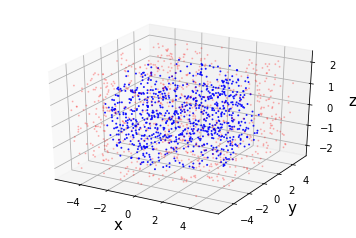

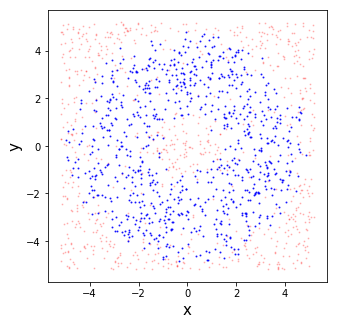

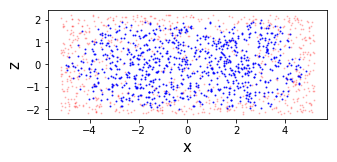

In [5]:
plotdata = True
if plotdata:
    from mpl_toolkits.mplot3d import Axes3D

    fs = 15   # fontsize
        
    # Select indices of 0 and 1 classes
    i0 = t_train[:,0]==1
    i1 = t_train[:,1]==1
    
    # 3d scatter plot
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')


    

    xs = x_train[:,0]
    ys = x_train[:,1]
    zs = x_train[:,2]
    
    
    ax.scatter(xs[i0], ys[i0], zs[i0], c='r', s=1, alpha=0.2)#, marker=m)
    ax.scatter(xs[i1], ys[i1], zs[i1], c='b', s=1, alpha=0.8)#, marker=m)

    ax.set_xlabel('x', fontsize=fs)
    ax.set_ylabel('y', fontsize=fs)
    ax.set_zlabel('z', fontsize=fs)
    plt.show();
    
    
    
    # xy plot
    plt.clf()
    plt.figure(figsize=(5,5))
    plt.scatter(xs[i0], ys[i0], c='r', s=1, alpha=0.2)
    plt.scatter(xs[i1], ys[i1], c='b', s=1, alpha=0.8)
    plt.xlabel('x', fontsize=fs)
    plt.ylabel('y', fontsize=fs)
    plt.show();
    
    
    
    # xz plot
    plt.clf()
    plt.figure(figsize=(5,2))
    plt.scatter(xs[i0], zs[i0], c='r', s=1, alpha=0.2)
    plt.scatter(xs[i1], zs[i1], c='b', s=1, alpha=0.8)
    plt.xlabel('x', fontsize=fs)
    plt.ylabel('z', fontsize=fs)
    plt.show();

##### It's a donut. Yum! --the notebook data_generator.ipynb contains the code that generated this data set

###### Let us start with a super simple example: a network with only one neuron

Epoch: 0    cost= 0.7528    train acc.= 0.509375    test acc.= 0.498747
Epoch: 25    cost= 0.7405    train acc.= 0.508125    test acc.= 0.513784
Epoch: 50    cost= 0.7273    train acc.= 0.503125    test acc.= 0.511278
Epoch: 75    cost= 0.7149    train acc.= 0.51375    test acc.= 0.518797
Epoch: 100    cost= 0.7043    train acc.= 0.52375    test acc.= 0.531328
Epoch: 125    cost= 0.6955    train acc.= 0.53375    test acc.= 0.548872
Epoch: 150    cost= 0.6889    train acc.= 0.545    test acc.= 0.548872
Epoch: 175    cost= 0.6846    train acc.= 0.553125    test acc.= 0.54386
Epoch: 200    cost= 0.6817    train acc.= 0.563125    test acc.= 0.54386
Epoch: 225    cost= 0.6797    train acc.= 0.564375    test acc.= 0.54386
Epoch: 250    cost= 0.6783    train acc.= 0.54875    test acc.= 0.516291
Epoch: 275    cost= 0.6773    train acc.= 0.526875    test acc.= 0.491228
Epoch: 300    cost= 0.6767    train acc.= 0.516875    test acc.= 0.488722
Epoch: 325    cost= 0.6763    train acc.= 0.515    te

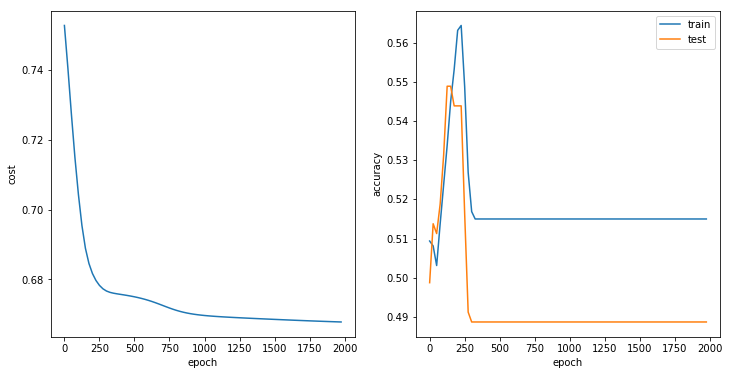

In [16]:
##########################
# Single neuron classifier

# Learning parameters
learning_rate = 0.001
training_epochs = 2000
batch_size = 250

# Optimization

opt_type = 'Adam' # 'GD' # 


# Printout options
display_step = 25


train_num_examples = Ntra


# Network Parameters
n_input = Nfeat       # Number of features
n_classes = 2         # total classes 


# Create tensor placeholders for features and targets
x = tf.placeholder("float", [None, n_input])
y = tf.placeholder("float", [None, n_classes])


# NEURAL NET DEFINITION
#
# Layers weights and biases are initialized with normally
# distributed random values.
weights = {
    'h': tf.Variable(tf.random_normal([n_input, n_classes]))
}
biases = {
    'b': tf.Variable(tf.random_normal([n_classes]))
}
#
# Network topology
def perceptron(x, weights, biases):
    # Single hidden neuron with sigmoid activation
    neuron = tf.add(tf.matmul(x, weights['h']), biases['b'])
    out_layer = tf.nn.sigmoid(neuron)
    return out_layer



# Python list of model internal parameters
params  = tf.trainable_variables()


# Construct model
pred = perceptron(x, weights, biases)


# Define cost function: cross-entropy of the softmax 
# probability distribution on the output layer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=y))


# Cost function optimization routine
if opt_type == 'GD':
    optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
elif opt_type == 'Adam':
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)
else:
    print("ERROR: optimizer type unknown. Exiting...")
    exit()


# Method that evaluates if a prediction is correct.
# Take output unit 
correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))



# METRICS
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))



# Initialize variables
init = tf.global_variables_initializer()


epochs = []
costs = []
train_accs = []
test_accs = []
# Launch the graph
with tf.Session() as sess:
    sess.run(init)

    # Training cycle
    for epoch in range(training_epochs):
        avg_cost = 0.0
        total_batch = int(train_num_examples/batch_size)
        
        # Loop over all batches
        for i in range(total_batch):
            iL_batch = i*batch_size
            iR_batch = (i+1)*batch_size
            batch_x = x_train[iL_batch:iR_batch, :]
            batch_y = t_train[iL_batch:iR_batch, :]

            # Run optimization (backpropagation) and cost (to get loss value)
            _, c, = sess.run([optimizer, cost], feed_dict={x: batch_x, y: batch_y})
            
            # Compute average loss in batch
            avg_cost += c / total_batch
            
            
        # Display logs per epoch step
        if epoch % display_step == 0:

            train_acc = accuracy.eval({x: x_train, y: t_train}) 
            test_acc = accuracy.eval({x: x_test,   y: t_test})
            print("Epoch:", epoch, "  ", 
                  "cost=", round(avg_cost,4), "  ", 
                  "train acc.=", train_acc, "  ",  
                  "test acc.=", test_acc)
            
            # Save metrics to evaluate convergence
            epochs.append(epoch)
            costs.append(avg_cost) 
            train_accs.append(train_acc)
            test_accs.append(test_acc)
            
            
    
    print("Optimization Finished!")
    
    
    # Calculate accuracy and bias on test set
    #accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    print("Train accuracy:", accuracy.eval({x: x_train, y: t_train}))
    print("Test accuracy :", accuracy.eval({x: x_test,  y: t_test}))
    

    
# Convergence plots
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6), sharey=False)
ax1.plot(epochs, costs)
ax1.set_xlabel('epoch')
ax1.set_ylabel('cost')

ax2.plot(epochs, train_accs, label='train')
ax2.plot(epochs, test_accs, label='test')
ax2.set_xlabel('epoch')
ax2.set_ylabel('accuracy')
ax2.legend()

##### Ugh, that didn't go very well. But it makes sense: we basically ran logistic regression (actually a perceptron) on a our nonlinear donut. Let's introduce multiple neurons in the hidden layer to do better!

Epoch: 0    cost= 4.9679    train acc.= 0.526875    test acc.= 0.513784
Epoch: 100    cost= 0.1548    train acc.= 0.966875    test acc.= 0.942356
Epoch: 200    cost= 0.1057    train acc.= 0.97375    test acc.= 0.947368
Epoch: 300    cost= 0.0821    train acc.= 0.978125    test acc.= 0.947368
Epoch: 400    cost= 0.0668    train acc.= 0.98    test acc.= 0.952381
Epoch: 500    cost= 0.0558    train acc.= 0.980625    test acc.= 0.93985
Epoch: 600    cost= 0.0475    train acc.= 0.980625    test acc.= 0.934837
Epoch: 700    cost= 0.0411    train acc.= 0.980625    test acc.= 0.932331
Epoch: 800    cost= 0.0362    train acc.= 0.979375    test acc.= 0.929825
Epoch: 900    cost= 0.0328    train acc.= 0.978125    test acc.= 0.927318
Epoch: 1000    cost= 0.0314    train acc.= 0.97625    test acc.= 0.927318
Epoch: 1100    cost= 0.0303    train acc.= 0.985625    test acc.= 0.934837
Epoch: 1200    cost= 0.0261    train acc.= 0.990625    test acc.= 0.944862
Epoch: 1300    cost= 0.0229    train acc.= 0

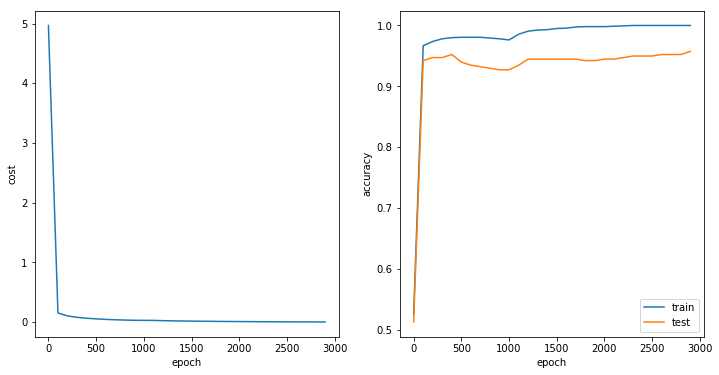

In [7]:
#####################################################
# Neural net with 1 hidden layer

# Learning parameters
learning_rate = 0.001
training_epochs = 3000
batch_size = 50

# Optimization

opt_type = 'Adam' # 'GD' # 


# Printout options
display_step = 100


train_num_examples = Ntra


# Network Parameters
n_input = Nfeat       # Number of features
n_hidden_1 = 500      # 1st layer number of features
n_classes = 2         # total classes 



# tf Graph input
x = tf.placeholder("float", [None, n_input])
y = tf.placeholder("float", [None, n_classes])



# NEURAL NET DEFINITION
# Layers weights and biases
weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'out': tf.Variable(tf.random_normal([n_hidden_1, n_classes]))
}
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}


# Network
def single_layer_net(x, weights, biases):
    # Hidden layer with sigmoid activation
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.sigmoid(layer_1)
    # Output layer with linear activation
    out_layer = tf.matmul(layer_1, weights['out']) + biases['out']
    return out_layer



# List of model internal parameters
params  = tf.trainable_variables()


# Construct model
pred = single_layer_net(x, weights, biases)


# Define cost function:
# cross-entropy of the softmax probability distribution on the output layer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=y))


# Cost function optimization routine
if opt_type == 'GD':
    optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
elif opt_type == 'Adam':
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)
else:
    print("ERROR: optimizer type unknown. Exiting...")
    exit()


    
# Method that evaluates if a prediction is correct
correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))



# METRICS
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))



# Initialize variables
init = tf.global_variables_initializer()


epochs = []
costs = []
train_accs = []
test_accs = []
# Launch the graph
with tf.Session() as sess:
    sess.run(init)

    # Training cycle
    for epoch in range(training_epochs):
        avg_cost = 0.0
        total_batch = int(train_num_examples/batch_size)
        
        # Loop over all batches
        for i in range(total_batch):
            iL_batch = i*batch_size
            iR_batch = (i+1)*batch_size
            batch_x = x_train[iL_batch:iR_batch, :]
            batch_y = t_train[iL_batch:iR_batch, :]

            # Run optimization (backpropagation) and cost (to get loss value)
            _, c, = sess.run([optimizer, cost], feed_dict={x: batch_x, y: batch_y})
            
            # Compute average loss in batch
            avg_cost += c / total_batch
            
            
        # Display logs per epoch step
        if epoch % display_step == 0:

            train_acc = accuracy.eval({x: x_train, y: t_train}) 
            test_acc = accuracy.eval({x: x_test,   y: t_test})
            print("Epoch:", epoch, "  ", 
                  "cost=", round(avg_cost,4), "  ", 
                  "train acc.=", train_acc, "  ",  
                  "test acc.=", test_acc)
            
            # Save metrics to evaluate convergence
            epochs.append(epoch)
            costs.append(avg_cost) 
            train_accs.append(train_acc)
            test_accs.append(test_acc)
            
    
    print("Optimization Finished!")
    
    
    # Calculate accuracy and bias on test set
    #accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    print("Train accuracy:", accuracy.eval({x: x_train, y: t_train}))
    print("Test accuracy :", accuracy.eval({x: x_test,  y: t_test}))
    
    
# Convergence plots
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6), sharey=False)
ax1.plot(epochs, costs)
ax1.set_xlabel('epoch')
ax1.set_ylabel('cost')

ax2.plot(epochs, train_accs, label='train')
ax2.plot(epochs, test_accs, label='test')
ax2.set_xlabel('epoch')
ax2.set_ylabel('accuracy')
ax2.legend()

###### It seems that the network is doing a great job, but after some training epochs (1000 approx) it begins to overfit the training data. We will see at the end a method to deal with that. But now let's build our first "deep neural network" a neural network with 2 hidden layers

Epoch: 0    cost= 8.6941    train acc.= 0.485    test acc.= 0.511278
Epoch: 25    cost= 3.0516    train acc.= 0.495    test acc.= 0.518797
Epoch: 50    cost= 1.0992    train acc.= 0.509375    test acc.= 0.526316
Epoch: 75    cost= 0.7187    train acc.= 0.549375    test acc.= 0.558897
Epoch: 100    cost= 0.6328    train acc.= 0.65125    test acc.= 0.639098
Epoch: 125    cost= 0.6036    train acc.= 0.66875    test acc.= 0.651629
Epoch: 150    cost= 0.5882    train acc.= 0.68625    test acc.= 0.679198
Epoch: 175    cost= 0.5731    train acc.= 0.703125    test acc.= 0.696742
Epoch: 200    cost= 0.558    train acc.= 0.7125    test acc.= 0.716792
Epoch: 225    cost= 0.54    train acc.= 0.73    test acc.= 0.726817
Optimization Finished!
Train accuracy: 0.76375
Test accuracy : 0.754386


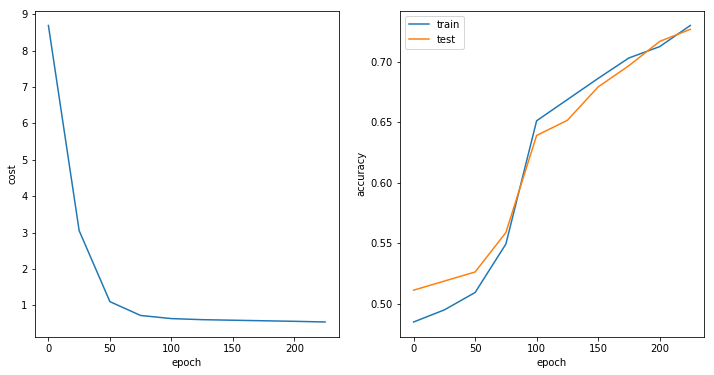

In [8]:
##################
# 2-layer network

# Learning parameters
learning_rate = 0.001
training_epochs = 250
batch_size = 100

# Optimization

opt_type = 'Adam' # 'GD' # 


# Printout options
display_step = 25


train_num_examples = Ntra


# Network Parameters
n_input = Nfeat       # Number of features
n_hidden_1 = 5        # 1st layer number of units
n_hidden_2 = 5        # 2st layer number of units
n_classes  = 2        # total classes 



# tf Graph input
x = tf.placeholder("float", [None, n_input])
y = tf.placeholder("float", [None, n_classes])



# NEURAL NET DEFINITION
# Layers weights and biases
weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_input, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, n_classes]))
}
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}


# Network
def two_layer_net(x, weights, biases):
    # Hidden layer with sigmoid activation
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.sigmoid(layer_1)
    # Hidden layer with ReLu activation
    layer_2 = tf.add(tf.matmul(x, weights['h2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
    # Output layer with linear activation
    out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
    return out_layer



# List of model internal parameters
params  = tf.trainable_variables()


# Construct model
pred = two_layer_net(x, weights, biases)


# Define cost function:
# cross-entropy of the softmax probability distribution on the output layer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=y))


# Cost function optimization routine
if opt_type == 'GD':
    optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
elif opt_type == 'Adam':
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)
else:
    print("ERROR: optimizer type unknown. Exiting...")
    exit()


    
# Method that evaluates if a prediction is correct
correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))



# METRICS
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))



# Initialize variables
init = tf.global_variables_initializer()


epochs = []
costs = []
train_accs = []
test_accs = []
# Launch the graph
with tf.Session() as sess:
    sess.run(init)

    # Training cycle
    for epoch in range(training_epochs):
        avg_cost = 0.0
        total_batch = int(train_num_examples/batch_size)
        
        # Loop over all batches
        for i in range(total_batch):
            iL_batch = i*batch_size
            iR_batch = (i+1)*batch_size
            batch_x = x_train[iL_batch:iR_batch, :]
            batch_y = t_train[iL_batch:iR_batch, :]

            # Run optimization (backpropagation) and cost (to get loss value)
            _, c, = sess.run([optimizer, cost], feed_dict={x: batch_x, y: batch_y})
            
            # Compute average loss in batch
            avg_cost += c / total_batch
            
            
        # Display logs per epoch step
        if epoch % display_step == 0:

            train_acc = accuracy.eval({x: x_train, y: t_train}) 
            test_acc = accuracy.eval({x: x_test,   y: t_test})
            print("Epoch:", epoch, "  ", 
                  "cost=", round(avg_cost,4), "  ", 
                  "train acc.=", train_acc, "  ",  
                  "test acc.=", test_acc)
            
            # Save metrics to evaluate convergence
            epochs.append(epoch)
            costs.append(avg_cost) 
            train_accs.append(train_acc)
            test_accs.append(test_acc)
            
    
    print("Optimization Finished!")
    
    
    # Calculate accuracy and bias on test set
    #accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    print("Train accuracy:", accuracy.eval({x: x_train, y: t_train}))
    print("Test accuracy :", accuracy.eval({x: x_test,  y: t_test}))
    
    
# Convergence plots
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6), sharey=False)
ax1.plot(epochs, costs)
ax1.set_xlabel('epoch')
ax1.set_ylabel('cost')

ax2.plot(epochs, train_accs, label='train')
ax2.plot(epochs, test_accs, label='test')
ax2.set_xlabel('epoch')
ax2.set_ylabel('accuracy')
ax2.legend()

###### It looks like this model could have benefited from more training epochs... But let's move on to a 3-layer net.

Epoch: 0    cost= 2.1405    train acc.= 0.485    test acc.= 0.511278
Epoch: 25    cost= 0.7334    train acc.= 0.49125    test acc.= 0.513784
Epoch: 50    cost= 0.6935    train acc.= 0.526875    test acc.= 0.506266
Epoch: 75    cost= 0.6777    train acc.= 0.62625    test acc.= 0.646617
Epoch: 100    cost= 0.66    train acc.= 0.66    test acc.= 0.646617
Epoch: 125    cost= 0.6394    train acc.= 0.69    test acc.= 0.669173
Epoch: 150    cost= 0.616    train acc.= 0.688125    test acc.= 0.686717
Epoch: 175    cost= 0.5795    train acc.= 0.741875    test acc.= 0.756892
Epoch: 200    cost= 0.5414    train acc.= 0.75875    test acc.= 0.766917
Epoch: 225    cost= 0.5137    train acc.= 0.770625    test acc.= 0.776942
Optimization Finished!
Train accuracy: 0.7875
Test accuracy : 0.79198


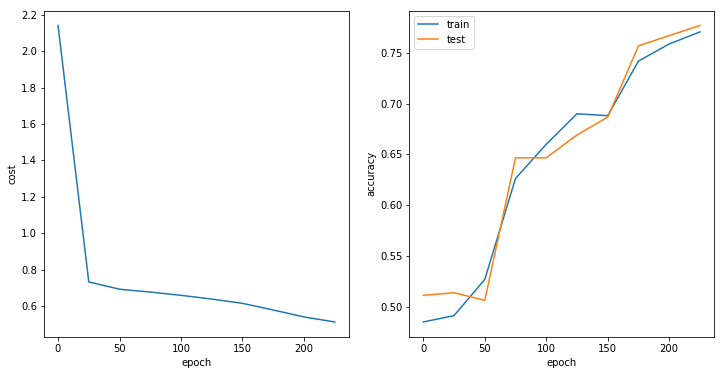

In [9]:
##################
# 3-layer network

# Learning parameters
learning_rate = 0.001
training_epochs = 250
batch_size = 100

# Optimization

opt_type = 'Adam' # 'GD' # 


# Printout options
display_step = 25


train_num_examples = Ntra


# Network Parameters
n_input = Nfeat       # Number of features
n_hidden_1 = 4        # 1st layer number of units
n_hidden_2 = 7        # 2st layer number of units
n_hidden_3 = 3        # 3rd layer number of units
n_classes = 2         # total classes 



# tf Graph input
x = tf.placeholder("float", [None, n_input])
y = tf.placeholder("float", [None, n_classes])



# NEURAL NET DEFINITION

# Layers weights and biases
weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'h3': tf.Variable(tf.random_normal([n_hidden_2, n_hidden_3])),
    'out': tf.Variable(tf.random_normal([n_hidden_3, n_classes]))
}
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'b3': tf.Variable(tf.random_normal([n_hidden_3])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

# Net
def three_layer_net(x, weights, biases):
    # Hidden layer with sigmoid activation
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.sigmoid(layer_1)
    # Hidden layer with ReLU activation
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
    # Hidden layer with sigmoid activation
    layer_3 = tf.add(tf.matmul(layer_2, weights['h3']), biases['b3'])
    layer_3 = tf.nn.sigmoid(layer_3)
    # Output layer with linear activation
    out_layer = tf.matmul(layer_3, weights['out']) + biases['out']
    return out_layer






# List of model internal parameters
params  = tf.trainable_variables()


# Construct model
pred = three_layer_net(x, weights, biases)


# Define cost function:
# cross-entropy of the softmax probability distribution on the output layer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=y))


# Cost function optimization routine
if opt_type == 'GD':
    optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
elif opt_type == 'Adam':
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)
else:
    print("ERROR: optimizer type unknown. Exiting...")
    exit()


    
# Method that evaluates if a prediction is correct
correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))



# METRICS
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))



# Initialize variables
init = tf.global_variables_initializer()

epochs = []
costs = []
train_accs = []
test_accs = []
# Launch the graph
with tf.Session() as sess:
    sess.run(init)

    # Training cycle
    for epoch in range(training_epochs):
        avg_cost = 0.0
        total_batch = int(train_num_examples/batch_size)
        
        # Loop over all batches
        for i in range(total_batch):
            iL_batch = i*batch_size
            iR_batch = (i+1)*batch_size
            batch_x = x_train[iL_batch:iR_batch, :]
            batch_y = t_train[iL_batch:iR_batch, :]

            # Run optimization (backpropagation) and cost (to get loss value)
            _, c, = sess.run([optimizer, cost], feed_dict={x: batch_x, y: batch_y})
            
            # Compute average loss in batch
            avg_cost += c / total_batch
            
            
        # Display logs per epoch step
        if epoch % display_step == 0:

            train_acc = accuracy.eval({x: x_train, y: t_train}) 
            test_acc = accuracy.eval({x: x_test,   y: t_test})
            print("Epoch:", epoch, "  ", 
                  "cost=", round(avg_cost,4), "  ", 
                  "train acc.=", train_acc, "  ",  
                  "test acc.=", test_acc)
            
            # Save metrics to evaluate convergence
            epochs.append(epoch)
            costs.append(avg_cost) 
            train_accs.append(train_acc)
            test_accs.append(test_acc)
            
    
    print("Optimization Finished!")
    
    
    # Calculate accuracy and bias on test set
    #accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    print("Train accuracy:", accuracy.eval({x: x_train, y: t_train}))
    print("Test accuracy :", accuracy.eval({x: x_test,  y: t_test}))
    
    

# Convergence plots
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6), sharey=False)
ax1.plot(epochs, costs)
ax1.set_xlabel('epoch')
ax1.set_ylabel('cost')

ax2.plot(epochs, train_accs, label='train')
ax2.plot(epochs, test_accs, label='test')
ax2.set_xlabel('epoch')
ax2.set_ylabel('accuracy')
ax2.legend()

###### Same as before: more training epochs seem to be necessary. But the accuracy has decreased! As the model has become more complex, more training is needed to achieve good accuracies. Play around with the parameters and see how high in accuracy you can get!

###### Remember that the 1-layer network was overfitting? L2 regularization is one way to tackle this issue. Let's see how to implement it. Pay close attention to the part of the code were the cost function is built.

Epoch: 0    cost= 21.0926    L2= 1268.54    train acc.= 0.488125    test acc.= 0.486216
Epoch: 100    cost= 2.2017    L2= 180.389    train acc.= 0.88375    test acc.= 0.87218
Epoch: 200    cost= 1.0076    L2= 53.089    train acc.= 0.8325    test acc.= 0.824561
Epoch: 300    cost= 0.7513    L2= 25.6946    train acc.= 0.819375    test acc.= 0.814536
Epoch: 400    cost= 0.6705    L2= 17.1798    train acc.= 0.821875    test acc.= 0.814536
Epoch: 500    cost= 0.6427    L2= 14.4889    train acc.= 0.82625    test acc.= 0.824561
Epoch: 600    cost= 0.6309    L2= 13.4915    train acc.= 0.8275    test acc.= 0.829574
Epoch: 700    cost= 0.625    L2= 13.1704    train acc.= 0.833125    test acc.= 0.834586
Epoch: 800    cost= 0.6222    L2= 13.0547    train acc.= 0.834375    test acc.= 0.837093
Epoch: 900    cost= 0.6201    L2= 12.9802    train acc.= 0.83875    test acc.= 0.834586
Epoch: 1000    cost= 0.6185    L2= 12.9505    train acc.= 0.845625    test acc.= 0.837093
Epoch: 1100    cost= 0.6173    

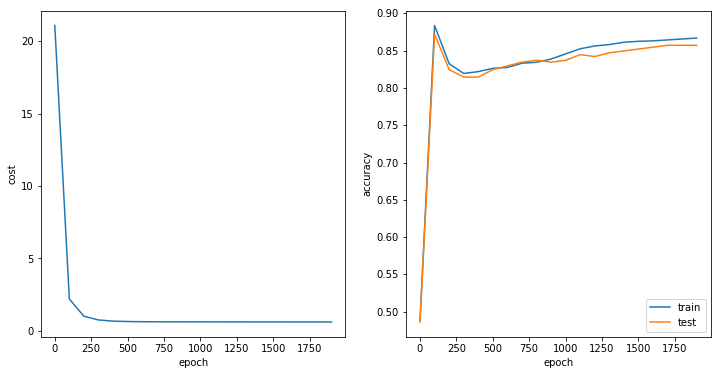

In [10]:
##################
# 1-layer network with L2 regularization

# Learning parameters
learning_rate = 0.001
training_epochs = 2000
batch_size = 50

# Optimization
opt_type = 'Adam' # 'GD' # 

# Regularization parameter
beta = 0.01

# Printout options
display_step = 100



train_num_examples = Ntra


# Network Parameters
n_input = Nfeat       # Number of features
n_hidden_1 = 500      # 1st layer number of units
n_classes = 2         # total classes 



# tf Graph input
x = tf.placeholder("float", [None, n_input])
y = tf.placeholder("float", [None, n_classes])



# NEURAL NET DEFINITION

# Layers weights and biases
weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'out': tf.Variable(tf.random_normal([n_hidden_1, n_classes]))
}
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

# Net
def one_layer_net(x, weights, biases):
    # Hidden layer with sigmoid activation
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.sigmoid(layer_1)
    # Output layer with linear activation
    out_layer = tf.matmul(layer_1, weights['out']) + biases['out']
    return out_layer



# List of model internal parameters
params  = tf.trainable_variables()


# Construct model
pred = one_layer_net(x, weights, biases)


# Define cost function
#
# cross-entropy of the softmax probability distribution on the output layer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=y))

# The L2 regularizer is the sum of the squares of all the weights.
# Since we have several weight vectors, one for each layer, we
# need to sum the L2 terms of each of them
regularizer = sum([tf.nn.l2_loss(weights[key]) for key in weights.keys()])

# Now, add the regularizer to the cost function
cost = cost + beta*regularizer


# Cost function optimization routine
if opt_type == 'GD':
    optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
elif opt_type == 'Adam':
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)
else:
    print("ERROR: optimizer type unknown. Exiting...")
    exit()


    
# Method that evaluates if a prediction is correct
correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))



# METRICS
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))



# Initialize variables
init = tf.global_variables_initializer()


epochs = []
costs = []
train_accs = []
test_accs = []
# Launch the graph
with tf.Session() as sess:
    sess.run(init)

    # Training cycle
    for epoch in range(training_epochs):
        avg_cost = 0.0
        total_batch = int(train_num_examples/batch_size)
        
        # Loop over all batches
        for i in range(total_batch):
            iL_batch = i*batch_size
            iR_batch = (i+1)*batch_size
            batch_x = x_train[iL_batch:iR_batch, :]
            batch_y = t_train[iL_batch:iR_batch, :]

            # Run optimization (backpropagation) and cost (to get loss value)
            _, c, = sess.run([optimizer, cost], feed_dict={x: batch_x, y: batch_y})
            
            # Compute average loss in batch
            avg_cost += c / total_batch
            
            
        # Display logs per epoch step
        if epoch % display_step == 0:

            train_acc = accuracy.eval({x: x_train, y: t_train}) 
            test_acc = accuracy.eval({x: x_test,   y: t_test})
            l2reg = regularizer.eval()
            print("Epoch:", epoch, "  ", 
                  "cost=", round(avg_cost,4), "  ", 
                  "L2=", l2reg, "  ", 
                  "train acc.=", train_acc, "  ",  
                  "test acc.=", test_acc)
            
            # Save metrics to evaluate convergence
            epochs.append(epoch)
            costs.append(avg_cost) 
            train_accs.append(train_acc)
            test_accs.append(test_acc)
            
    
    print("Optimization Finished!")
    
    
    # Calculate accuracy and bias on test set
    #accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    print("Train accuracy:", accuracy.eval({x: x_train, y: t_train}))
    print("Test accuracy :", accuracy.eval({x: x_test,  y: t_test}))
    
    
# Convergence plots
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6), sharey=False)
ax1.plot(epochs, costs)
ax1.set_xlabel('epoch')
ax1.set_ylabel('cost')

ax2.plot(epochs, train_accs, label='train')
ax2.plot(epochs, test_accs, label='test')
ax2.set_xlabel('epoch')
ax2.set_ylabel('accuracy')
ax2.legend()

In [11]:
# We can also wrap our model evaluation into a function.
# Notice that the data arrays and other variables such
# as the number of features are already in the namespace,
# so we do not need to take them as arguments in the wrapper
# function –although it would be better coding practice.

def run_model(learning_rate=0.001,
              training_epochs=100,
              batch_size=50,
              opt_type='GD',
              beta=0.01,
              display_step=10,
              print_steps=False):
    '''
    Wrapper function for model evaluation
    '''
    
    # Initialize variables
    init = tf.global_variables_initializer()


    epochs = []
    costs = []
    train_accs = []
    test_accs = []
    # Launch the graph
    with tf.Session() as sess:
        sess.run(init)

        # Training cycle
        for epoch in range(training_epochs):
            avg_cost = 0.0
            total_batch = int(train_num_examples/batch_size)
        
            # Loop over all batches
            for i in range(total_batch):
                iL_batch = i*batch_size
                iR_batch = (i+1)*batch_size
                batch_x = x_train[iL_batch:iR_batch, :]
                batch_y = t_train[iL_batch:iR_batch, :]

                # Run optimization (backpropagation) and cost (to get loss value)
                _, c, = sess.run([optimizer, cost], feed_dict={x: batch_x, y: batch_y})
            
                # Compute average loss in batch
                avg_cost += c / total_batch
            
            
            # Display logs per epoch step
            if epoch % display_step == 0:

                train_acc = accuracy.eval({x: x_train, y: t_train}) 
                test_acc = accuracy.eval({x: x_test,   y: t_test})
                l2reg = regularizer.eval()
                if print_steps:
                    print("Epoch:", epoch, "  ", 
                          "cost=", round(avg_cost,4), "  ", 
                          "L2=", l2reg, "  ", 
                          "train acc.=", train_acc, "  ",  
                          "test acc.=", test_acc)
            
                # Save metrics to evaluate convergence
                epochs.append(epoch)
                costs.append(avg_cost) 
                train_accs.append(train_acc)
                test_accs.append(test_acc)
            
    
        print("Optimization Finished!")
    
    
        # Calculate accuracy and bias on test set
        print("Train accuracy:", accuracy.eval({x: x_train, y: t_train}))
        print("Test accuracy :", accuracy.eval({x: x_test,  y: t_test}))
    
    
    
    # Convergence plots
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6), sharey=False)
    ax1.plot(epochs, costs)
    ax1.set_xlabel('epoch')
    ax1.set_ylabel('cost')

    ax2.plot(epochs, train_accs, label='train')
    ax2.plot(epochs, test_accs, label='test')
    ax2.set_xlabel('epoch')
    ax2.set_ylabel('accuracy')
    ax2.legend()
    
    # Return final train and test accuracies
    return train_accs[-1], test_accs[-1]

beta =  0.0
Optimization Finished!
Train accuracy: 0.86375
Test accuracy : 0.862155
beta =  0.001
Optimization Finished!
Train accuracy: 0.868125
Test accuracy : 0.869674
beta =  0.01
Optimization Finished!
Train accuracy: 0.870625
Test accuracy : 0.864662
beta =  0.1
Optimization Finished!
Train accuracy: 0.8725
Test accuracy : 0.864662


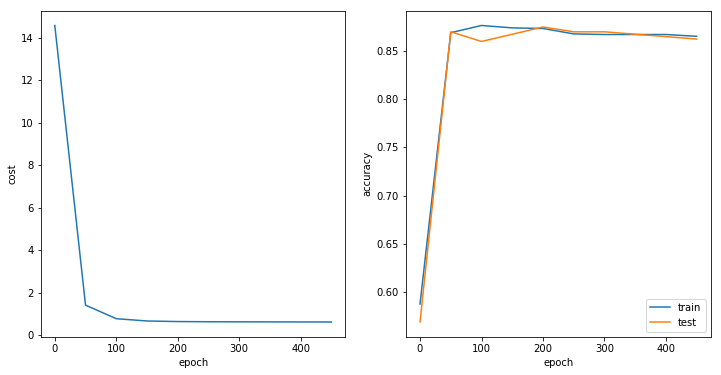

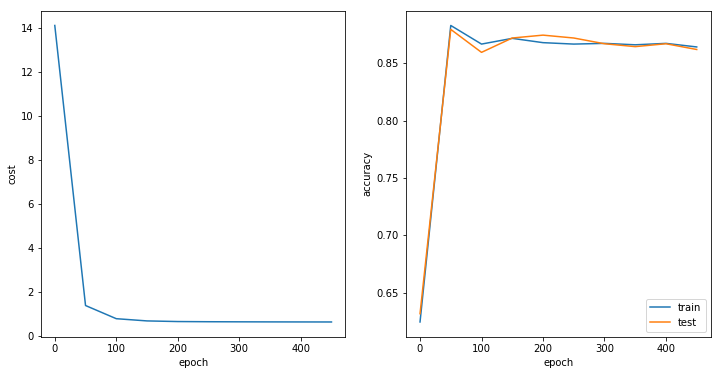

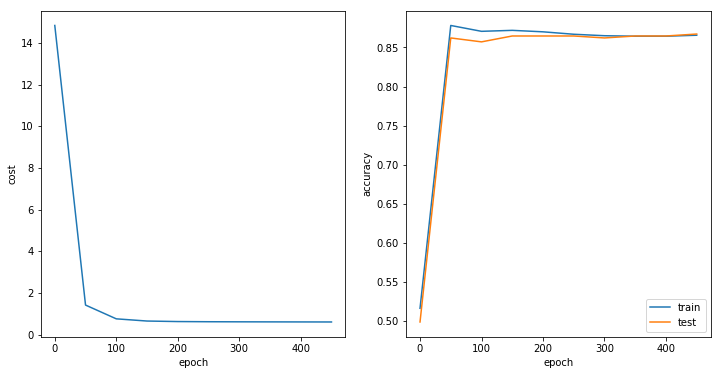

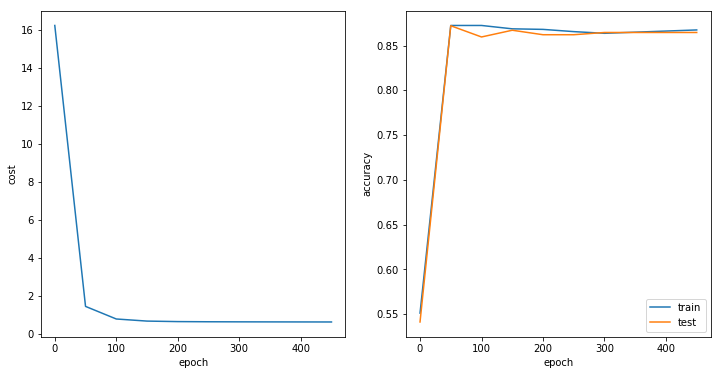

In [12]:
# Now with this wrapper function we can easily script 
# our model evaluation and evaluate the performance
# as parameters change

learning_rate = 0.001
training_epochs = 500
batch_size = 10
opt_type = 'Adam' # 'GD' # 
betas = [0.0, 0.001, 0.01, 0.1]
display_step = 50

train_accs=[]
test_accs =[]
for beta in betas:
    print('beta = ', beta)
    tr_a, te_a = run_model(learning_rate, 
                           training_epochs, 
                           batch_size, 
                           opt_type, 
                           beta, 
                           display_step)
    train_accs.append(tr_a)
    test_accs.append(te_a)

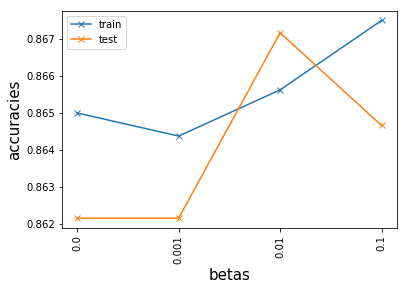

In [13]:
# Plot train and test accuracies for all betas
plt.plot(range(len(train_accs)), train_accs, marker='x', label='train')
plt.plot(range(len(test_accs)), test_accs, marker='x', label='test')
plt.xlabel('betas', fontsize=15)
plt.ylabel('accuracies', fontsize=15)
plt.xticks(range(len(train_accs)), betas, rotation='vertical')
plt.legend()

## Closing notes
#### We have seen a few examples of neural networks for classification. They were not intended to be a thorough machine learning exercise, but rather a gentle intro to how to use Tensorflow. Hopefully you can use some of the pieces of code that you've seen here to build your own neural nets to perform a rigorous ML analysis. 

#### Have fun! :)